In [48]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import LSTM
from math import sqrt
import matplotlib.pyplot as plt
from numpy import array
from keras.layers import Dense, Dropout
import pandas as pd
import gc
# fit an LSTM network to training data
from keras import optimizers
from keras import callbacks
from keras.layers.normalization import BatchNormalization
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 50,40

In [49]:
df1 = pd.read_csv('sensex1.csv', parse_dates = ['Date'], index_col = 'Date')
df1 = df1['2015-01-20' : '2019-01-18']

In [50]:
df2 = pd.read_csv('NYSE.csv', parse_dates = ['Date'], index_col = 'Date')
df2 = df2['2015-01-20' : '2019-01-18']

In [51]:
df3 = pd.read_csv('Exchange.csv', parse_dates = ['Unnamed: 1'], index_col = 'Unnamed: 1')
df3 = df3['2015-01-20' : '2019-01-18']

In [52]:
df1 = df1.drop(['High', 'Open'], axis = 1)

In [53]:
df1 = df1.drop(['Low', 'Volume'], axis = 1)

In [54]:
df1 = df1.drop(['Adj Close'], axis = 1)

In [55]:
df1['SENSEX'] = df1.Close

In [63]:
df2.tail(50)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-06,12413.349609,12482.759766,12413.349609,12480.059570,12480.059570,3510860000
2018-11-07,12582.570313,12682.059570,12536.120117,12679.099609,12679.099609,3914750000
2018-11-08,12644.580078,12675.570313,12580.299805,12622.040039,12622.040039,3630490000
2018-11-09,12566.330078,12569.250000,12474.879883,12537.530273,12537.530273,4019090000
2018-11-12,12521.160156,12523.009766,12330.799805,12343.509766,12343.509766,3670930000
2018-11-13,12365.259766,12446.240234,12301.269531,12328.299805,12328.299805,4091440000
2018-11-14,12398.929688,12435.650391,12202.419922,12275.490234,12275.490234,4402370000
2018-11-15,12194.690430,12379.129883,12147.669922,12361.519531,12361.519531,4179140000
2018-11-16,12329.429688,12433.719727,12308.610352,12400.280273,12400.280273,3975180000


In [56]:
df1 = df1.drop(['Close'], axis = 1)

In [57]:
df1['NYSE'] = df2.Close

In [58]:
df1['Exc'] = df3.exc 

In [59]:
df1 = df1['2015-01-20' : ]
df1[df1==np.inf]=np.nan
#df.fillna(df.mean(), inplace=True)
df1.dropna()

,SENSEX,NYSE,Exc
Date,,,
2015-01-20,28784.669922,10658.629883,61.8475
2015-01-21,28888.859375,10720.400391,61.6140
2015-01-22,29006.019531,10859.349609,61.6910
2015-01-23,29278.839844,10788.330078,61.4988
2015-01-27,29571.039063,10781.830078,61.4640
2015-01-28,29559.179688,10603.860352,61.4105
2015-01-29,29681.769531,10691.629883,61.4998
2015-01-30,29182.949219,10537.219727,61.7575
2015-02-02,29122.269531,10669.030273,61.8840


In [60]:
df1 = df1.dropna()
df1 = df1.asfreq('D', method="pad")

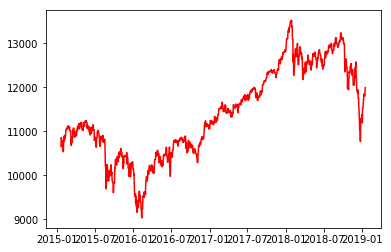

In [61]:
plt.plot(df1['NYSE'], color='red')

In [14]:
temp1 = np.array(df1['SENSEX'])
temp2 = np.array(df1['NYSE'])
temp3 = np.array(df1['Exc'])

In [15]:
temp1 = temp1.reshape(-1,1)
temp2 = temp2.reshape(-1,1)
temp3 = temp3.reshape(-1,1)

In [16]:
temp1.shape

(1459, 1)

In [65]:
scaler = MinMaxScaler(feature_range=(0.69, 1))
scaled_data1 = scaler.fit_transform(temp1)
scaled_data2 = scaler.fit_transform(temp2)
scaled_data3 = scaler.fit_transform(temp3)

In [66]:
df1['SENSEX'] = scaled_data1
df1['NYSE'] = scaled_data2
df1['Exc'] = scaled_data3


In [67]:
df = df1

In [68]:
df.head()

,SENSEX,NYSE,Exc
Date,,,
2015-01-20,0.803403,0.802333,0.700439
2015-01-21,0.805428,0.806594,0.694861
2015-01-22,0.807706,0.816177,0.696701
2015-01-23,0.813010,0.811279,0.692109
2015-01-24,0.813010,0.811279,0.692109


In [69]:
df.tail(50)

,SENSEX,NYSE,Exc
Date,,,
2018-11-29,0.946997,0.921701,0.893181
2018-11-30,0.947461,0.926403,0.887005
2018-12-01,0.947461,0.926403,0.887005
2018-12-02,0.947461,0.926403,0.887005
2018-12-03,0.948369,0.934679,0.895858
2018-12-04,0.946295,0.910156,0.903443
2018-12-05,0.946295,0.910156,0.903443
2018-12-06,0.930310,0.904806,0.919964
2018-12-07,0.937331,0.890841,0.908718


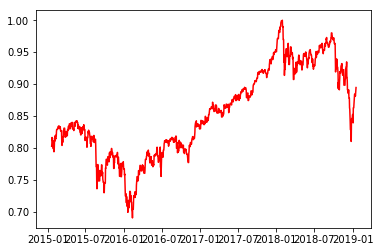

In [70]:
plt.plot(df['NYSE'], color='red')

In [71]:
df = df['2015-01-20' : ]
df[df==np.inf]=np.nan
#df.fillna(df.mean(), inplace=True)
df.dropna()

,SENSEX,NYSE,Exc
Date,,,
2015-01-20,0.803403,0.802333,0.700439
2015-01-21,0.805428,0.806594,0.694861
2015-01-22,0.807706,0.816177,0.696701
2015-01-23,0.813010,0.811279,0.692109
2015-01-24,0.813010,0.811279,0.692109
2015-01-25,0.813010,0.811279,0.692109
2015-01-26,0.813010,0.811279,0.692109
2015-01-27,0.818691,0.810830,0.691278
2015-01-28,0.818461,0.798556,0.690000


In [72]:
df = df.dropna()
df = df.asfreq('D', method="pad")

In [73]:
df.shape

(1459, 3)

In [24]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i))  for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    #print(cols)
    #print(names)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    #print(agg)
    return agg

In [25]:
n_lag = 20
n_seq = 1
n_test = 39
n_epochs = 200
n_batch = 20
n_neurons = 10

In [26]:
supervised = series_to_supervised(df, n_lag, n_seq)

In [27]:
supervised[:10]

,var1(t-20),var2(t-20),var3(t-20),var1(t-19),var2(t-19),var3(t-19),var1(t-18),var2(t-18),var3(t-18),var1(t-17),...,var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-09,0.365815,0.362366,0.033675,0.372349,0.376108,0.015682,0.379697,0.407022,0.021615,0.396807,...,0.025106,0.361628,0.404388,0.025106,0.361628,0.404388,0.025106,0.330864,0.399733,0.056292
2015-02-10,0.372349,0.376108,0.015682,0.379697,0.407022,0.021615,0.396807,0.391221,0.006804,0.396807,...,0.025106,0.361628,0.404388,0.025106,0.330864,0.399733,0.056292,0.338906,0.419434,0.042606
2015-02-11,0.379697,0.407022,0.021615,0.396807,0.391221,0.006804,0.396807,0.391221,0.006804,0.396807,...,0.025106,0.330864,0.399733,0.056292,0.338906,0.419434,0.042606,0.350092,0.413630,0.057263
2015-02-12,0.396807,0.391221,0.006804,0.396807,0.391221,0.006804,0.396807,0.391221,0.006804,0.396807,...,0.056292,0.338906,0.419434,0.042606,0.350092,0.413630,0.057263,0.367096,0.437270,0.078562
2015-02-13,0.396807,0.391221,0.006804,0.396807,0.391221,0.006804,0.396807,0.391221,0.006804,0.415133,...,0.042606,0.350092,0.413630,0.057263,0.367096,0.437270,0.078562,0.385273,0.447812,0.055907
2015-02-14,0.396807,0.391221,0.006804,0.396807,0.391221,0.006804,0.415133,0.389775,0.004123,0.414389,...,0.057263,0.367096,0.437270,0.078562,0.385273,0.447812,0.055907,0.385273,0.447812,0.055907
2015-02-15,0.396807,0.391221,0.006804,0.415133,0.389775,0.004123,0.414389,0.350180,0.000000,0.422077,...,0.078562,0.385273,0.447812,0.055907,0.385273,0.447812,0.055907,0.385273,0.447812,0.055907
2015-02-16,0.415133,0.389775,0.004123,0.414389,0.350180,0.000000,0.422077,0.369707,0.006881,0.390793,...,0.055907,0.385273,0.447812,0.055907,0.385273,0.447812,0.055907,0.385273,0.447812,0.055907
2015-02-17,0.414389,0.350180,0.000000,0.422077,0.369707,0.006881,0.390793,0.335354,0.026740,0.390793,...,0.055907,0.385273,0.447812,0.055907,0.385273,0.447812,0.055907,0.385273,0.447812,0.055907


In [28]:
supervised.drop(supervised.columns[[len(supervised.columns)-1]], axis=1, inplace=True)

In [29]:
supervised.drop(supervised.columns[[len(supervised.columns)-1]], axis=1, inplace=True)

In [30]:
supervised[:5]

,var1(t-20),var2(t-20),var3(t-20),var1(t-19),var2(t-19),var3(t-19),var1(t-18),var2(t-18),var3(t-18),var1(t-17),...,var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t)
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-09,0.365815,0.362366,0.033675,0.372349,0.376108,0.015682,0.379697,0.407022,0.021615,0.396807,...,0.361628,0.404388,0.025106,0.361628,0.404388,0.025106,0.361628,0.404388,0.025106,0.330864
2015-02-10,0.372349,0.376108,0.015682,0.379697,0.407022,0.021615,0.396807,0.391221,0.006804,0.396807,...,0.361628,0.404388,0.025106,0.361628,0.404388,0.025106,0.330864,0.399733,0.056292,0.338906
2015-02-11,0.379697,0.407022,0.021615,0.396807,0.391221,0.006804,0.396807,0.391221,0.006804,0.396807,...,0.361628,0.404388,0.025106,0.330864,0.399733,0.056292,0.338906,0.419434,0.042606,0.350092
2015-02-12,0.396807,0.391221,0.006804,0.396807,0.391221,0.006804,0.396807,0.391221,0.006804,0.396807,...,0.330864,0.399733,0.056292,0.338906,0.419434,0.042606,0.350092,0.413630,0.057263,0.367096
2015-02-13,0.396807,0.391221,0.006804,0.396807,0.391221,0.006804,0.396807,0.391221,0.006804,0.415133,...,0.338906,0.419434,0.042606,0.350092,0.413630,0.057263,0.367096,0.437270,0.078562,0.385273


In [31]:
supervised_values = supervised.values
len(supervised_values)

1439

In [32]:
train, test = supervised_values[0:-n_test], supervised_values[-n_test:]

In [33]:
def fit_lstm(train, n_lag, n_seq, n_batch, nb_epoch, n_neurons):
    # reshape training into [samples, timesteps, features]
    #print(train.shape)
    X, y = train[:, :-1], train[:, -1:]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    #print(X)
    #print(y)
    #print(X.shape)
    #print(y.shape)
    # design network
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=(n_batch, X.shape[1], X.shape[2]), stateful=True, return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(10, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(5, activation='relu'))
    model.add(BatchNormalization())
    #model.add(Dense(6, activation='relu'))
    model.add(Flatten())
    model.add(Dense(y.shape[1]))
    
    #adam = optimizers.Adam(lr=.001)

    #model.compile(loss='mean_squared_error', optimizer='adam')

    #learning_rate = 0.00004
    adam = optimizers.Adam(lr=.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer= adam)
    
    # sgd optimizer
    #sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
    #model.compile(loss='mean_squared_error', optimizer= sgd)
    
    #rmsprop optimizer
    #rmsprop=optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
    #model.compile(optimizer=rmsprop,loss='mse')
    
    # Early stopping callback
    #earlyStop = callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='min')
    
    # fit network
    for i in range(nb_epoch):
        #model.fit(X, y, epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
        print("Iteration Number is:",i)
        # with callbacks
        model.fit(X, y, epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
        model.reset_states()
        #learning_rate = learning_rate * 1/(1 + 0.000001 * (i+1))
    return model

In [574]:
model = fit_lstm(train, n_lag, n_seq, n_batch, n_epochs, n_neurons)

Iteration Number is: 0
Epoch 1/1
1400/1400 [==============================] - 4s 3ms/step - loss: 0.8427
Iteration Number is: 1
Epoch 1/1
1400/1400 [==============================] - 0s 272us/step - loss: 0.3824
Iteration Number is: 2
Epoch 1/1
1400/1400 [==============================] - 1s 426us/step - loss: 0.2320
Iteration Number is: 3
Epoch 1/1
1400/1400 [==============================] - 0s 341us/step - loss: 0.1809
Iteration Number is: 4
Epoch 1/1
1400/1400 [==============================] - 0s 290us/step - loss: 0.1483
Iteration Number is: 5
Epoch 1/1
1400/1400 [==============================] - 0s 298us/step - loss: 0.1313
Iteration Number is: 6
Epoch 1/1
1400/1400 [==============================] - 0s 290us/step - loss: 0.1181
Iteration Number is: 7
Epoch 1/1
1400/1400 [==============================] - 0s 289us/step - loss: 0.1097
Iteration Number is: 8
Epoch 1/1
1400/1400 [==============================] - 0s 277us/step - loss: 0.1022
Iteration Number is: 9
Epoch 1/1
1400/1

Iteration Number is: 76
Epoch 1/1
1400/1400 [==============================] - 0s 301us/step - loss: 0.0632
Iteration Number is: 77
Epoch 1/1
1400/1400 [==============================] - 0s 295us/step - loss: 0.0633
Iteration Number is: 78
Epoch 1/1
1400/1400 [==============================] - 0s 307us/step - loss: 0.0632
Iteration Number is: 79
Epoch 1/1
1400/1400 [==============================] - 0s 316us/step - loss: 0.0632
Iteration Number is: 80
Epoch 1/1
1400/1400 [==============================] - 0s 294us/step - loss: 0.0631
Iteration Number is: 81
Epoch 1/1
1400/1400 [==============================] - 0s 292us/step - loss: 0.0631
Iteration Number is: 82
Epoch 1/1
1400/1400 [==============================] - 0s 326us/step - loss: 0.0631
Iteration Number is: 83
Epoch 1/1
1400/1400 [==============================] - 0s 311us/step - loss: 0.0631
Iteration Number is: 84
Epoch 1/1
1400/1400 [==============================] - 0s 290us/step - loss: 0.0630
Iteration Number is: 85
Epoc

In [575]:
def forecast_lstm(model, X, n_batch):
    # reshape input pattern to [samples, timesteps, features]
    X = X.reshape(n_batch, 1, X.shape[1])
    # make forecast
    forecast = model.predict(X, batch_size=n_batch)
    # convert to array
    return [x for x in forecast[0, :]]

In [576]:
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
    forecasts = list()
    for i in range(len(test)-n_batch):
        X, y = test[i:n_batch+i, 0:-1], test[i:n_batch+i, -1:]
        # make forecast
        forecast = forecast_lstm(model, X, n_batch)
        # store the forecast
        forecasts.append(forecast)
    return forecasts

In [577]:
forecasts = make_forecasts(model, n_batch, train, test, n_lag, n_seq)

In [578]:
forecasts

[[0.45247224],
 [0.47231737],
 [0.47231737],
 [0.47231737],
 [0.47112596],
 [0.45845482],
 [0.44113907],
 [0.44224915],
 [0.44374868],
 [0.4453683],
 [0.42500198],
 [0.40532562],
 [0.4069091],
 [0.39411557],
 [0.4126361],
 [0.40099442],
 [0.379858],
 [0.37965333],
 [0.3979004]]

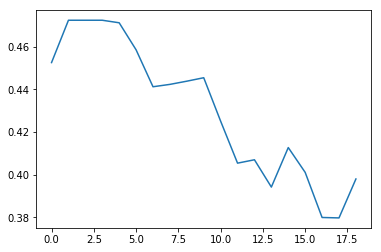

In [579]:
plt.plot(forecasts)

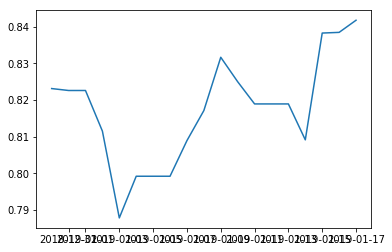

In [587]:
plt.plot(df.SENSEX[-19:])

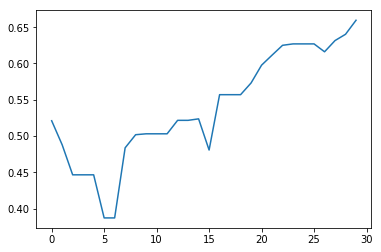

In [588]:
plt.plot(temp2[-30:])

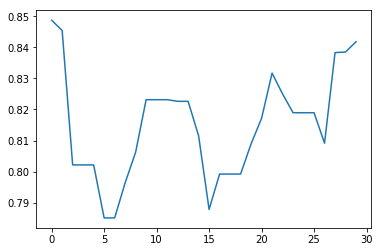

In [589]:
plt.plot(temp1[-30:])

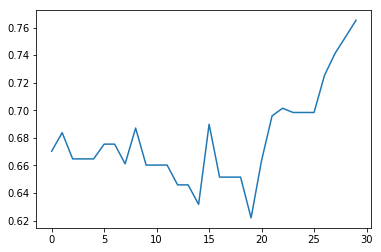

In [590]:
plt.plot(temp3[-30:])

In [591]:
rms = np.sqrt(np.mean(np.power(forecasts-scaled_data1[-19:],2)))
rms

0.3895160569771837

In [34]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [35]:
coin = coint_johansen(df, 0, 1)

In [36]:
coin.eig

array([0.010263  , 0.00373999, 0.00011642])

In [37]:
coin.lr1

array([20.65947148,  5.62901712,  0.16963022])

In [38]:
coin.lr2

array([15.03045437,  5.45938689,  0.16963022])

In [39]:
coin.cvt

array([[27.0669, 29.7961, 35.4628],
       [13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [40]:
coin.cvm

array([[18.8928, 21.1314, 25.865 ],
       [12.2971, 14.2639, 18.52  ],
       [ 2.7055,  3.8415,  6.6349]])

In [41]:
coin.ind

array([0, 1, 2])

/home/umang/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


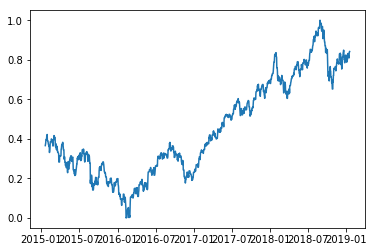

In [45]:
plt.plot(df['SENSEX'])

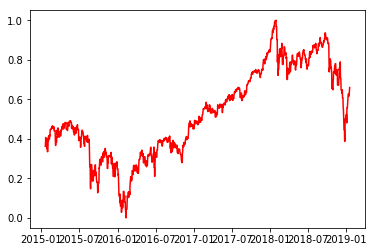

In [46]:
plt.plot(df['NYSE'], color='red')